# Neuronal connectivity based on cell morphologies
## KTH: Project course in Scientific Computing 

In [37]:
import os 
os.chdir("/Users/shriyabhatija/Documents/shriya/Dokumente/STUDIUM/MASTER/3. Semester - ERASMUS/Project Scientific Computing")
print(os.getcwd())


/Users/shriyabhatija/Documents/shriya/Dokumente/STUDIUM/MASTER/3. Semester - ERASMUS/Project Scientific Computing


In [5]:
#Importing the basic necessary packages and libraries

import matplotlib.pyplot as plt
from   matplotlib import cm

from scipy.stats import skewnorm
from   scipy._lib._util import check_random_state
from   scipy.stats._multivariate import _PSD, multi_rv_generic, multi_rv_frozen
from   scipy.special import gammaln

import seaborn as sns
import numpy as np
import collections

import tensorflow as tf
'TensorFlow version: ' + tf.__version__  
import tensorflow_probability as tfp
import tensorflow.compat.v1 as tfc
tfd = tfp.distributions

### Skew-elliptical distribution

In [6]:
from   scipy.stats import (multivariate_normal as mvn, norm)
from   scipy.stats._multivariate import _squeeze_output
from   matplotlib import cm

##############################################################

#Multivariate Skew-normal distribution

##############################################################


class multivariate_skewnorm:
    
    def __init__(self, shape, cov):
        self.dim   = len(shape)
        self.shape = np.asarray(shape)
        self.mean  = np.zeros(self.dim)
        self.cov   = np.eye(self.dim) if cov is None else np.asarray(cov)

    def pdf(self, x):
        return np.exp(self.logpdf(x))
        
    def logpdf(self, x):
        x    = mvn._process_quantiles(x, self.dim)
        pdf  = mvn(self.mean, self.cov).logpdf(x)
        cdf  = norm(0, 1).logcdf(np.dot(x, self.shape))
        return _squeeze_output(np.log(2) + pdf + cdf)
    
    def rvs(self, size=1):
        aCa      = self.shape @ self.cov @ self.shape
        delta    = (1 / np.sqrt(1 + aCa)) * self.cov @ self.shape
        cov_star = np.block([[np.ones(1),     delta],
                         [delta[:, None], self.cov]])
        x        = mvn(np.zeros(self.dim+1), cov_star).rvs(size)
        x0, x1   = x[:, 0], x[:, 1:]
        inds     = x0 <= 0
        x1[inds] = -1 * x1[inds]
        return x1
    
    
    def contour_plot(self):
        xxlim = 0., 100.
        yylim = 0., 100.
        xx = tf.linspace(*xxlim, num=100)
        yy = tf.linspace(*yylim, num=100)
        pos = tf.stack(tf.meshgrid(xx, yy), axis = -1)

        fig, ax = plt.subplots(figsize=(6, 5))
        #ax.set_title('')

        cb = ax.contourf(xx, yy, self.pdf(pos+[-50,-50]), levels = 20, cmap=cm.viridis)

        #fig.colorbar(cb, ax=ax)

        ax.set_xlim([0,100])
        ax.set_ylim([0,100])
        
    def scatter_plot(self):
        sample = self.rvs(size=2000) + [50,50]
        scatter = plt.scatter(sample[:,0],sample[:,1], alpha=0.2)
        plt.xlim([0,100])
        plt.ylim([0,100])
        return sample, scatter
        
        
class skew_opposite_dir:
    
    def __init__(self, shape, cov):
        self.shape = shape
        self.cov = cov
        
    def contour_plot(self):
        
        X = multivariate_skewnorm(self.shape, self.cov)
        Y = multivariate_skewnorm(-1*self.shape, self.cov)
        
        xxlim = 0., 100.
        yylim = 0., 100.
        xx = tf.linspace(*xxlim, num=100)
        yy = tf.linspace(*yylim, num=100)
        pos = tf.stack(tf.meshgrid(xx, yy), axis = -1)

        fig, ax = plt.subplots(figsize=(6, 5))
        #ax.set_title('')
        
        pdf = X.pdf(pos+[-28,-28]) + Y.pdf(pos+[-72,-72])

        cb = ax.contourf(xx, yy, pdf, levels = 20, cmap=cm.viridis)

        #fig.colorbar(cb, ax=ax)

        ax.set_xlim([0,100])
        ax.set_ylim([0,100])
        
        
    def scatter_plot(self):
        
        sample_X = multivariate_skewnorm(self.shape, self.cov).rvs(size=1000) + [28,28]
        sample_Y = multivariate_skewnorm(-1*self.shape, self.cov).rvs(size=1000) + [72,72]
        sample = np.concatenate((sample_X,sample_Y), axis=0)

        scatter = plt.scatter(sample[:,0],sample[:,1], alpha=0.2)
        plt.xlim([0,100])
        plt.ylim([0,100])
        
        return sample, scatter
        
    
class skew_same_dir:
    
    def __init__(self, shape, cov):
        self.shape = shape
        self.cov = cov
        
    def contour_plot(self):
        
        X = multivariate_skewnorm(self.shape, self.cov)
        Y = multivariate_skewnorm(-1*self.shape, self.cov)
        
        xxlim = 0., 100.
        yylim = 0., 100.
        xx = tf.linspace(*xxlim, num=100)
        yy = tf.linspace(*yylim, num=100)
        pos = tf.stack(tf.meshgrid(xx, yy), axis = -1)

        fig, ax = plt.subplots(figsize=(6, 5))
        #ax.set_title('')
        
        pdf = X.pdf(pos+[-51,-51]) + Y.pdf(pos+[-49,-49])

        cb = ax.contourf(xx, yy, pdf, levels = 20, cmap=cm.viridis)

        #fig.colorbar(cb, ax=ax)

        ax.set_xlim([0,100])
        ax.set_ylim([0,100])
        
        
    def scatter_plot(self):
        
        sample_X = multivariate_skewnorm(self.shape, self.cov).rvs(size=1000) + [51,51]
        sample_Y = multivariate_skewnorm(-1*self.shape, self.cov).rvs(size=1000) + [49,49]
        sample = np.concatenate((sample_X,sample_Y), axis=0)

        scatter = plt.scatter(sample[:,0],sample[:,1], alpha=0.2)
        plt.xlim([0,100])
        plt.ylim([0,100])
        
        return sample, scatter

2023-01-26 15:20:04.591274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


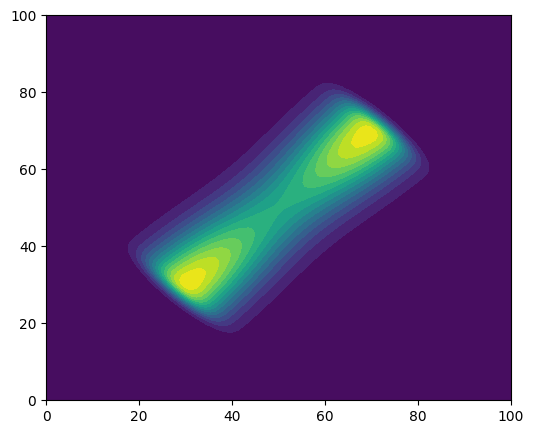

In [4]:
####################################

#shape3 - Pyramidal cell (version 1)

####################################

skew_opposite_dir(np.array([0.5,0.5]),[[230,180],[180,230]]).contour_plot()
#skew_opposite_dir(np.array([0.5,0.5]),[[230,180],[180,230]]).scatter_plot()

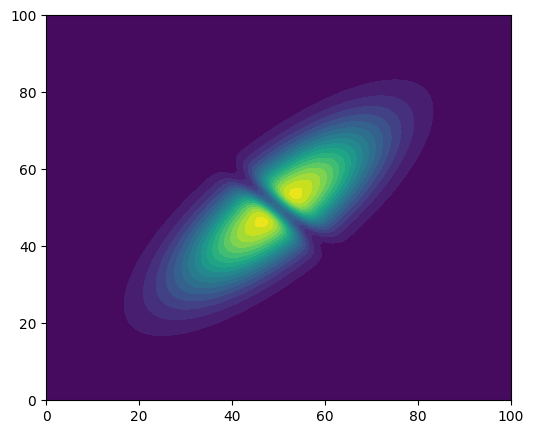

In [5]:
#######

#shape4

#######

skew_same_dir(np.array([0.5,0.5]),[[180,135],[135,180]]).contour_plot()
#skew_same_dir(np.array([0.5,0.5]),[[180,135],[135,180]]).scatter_plot()

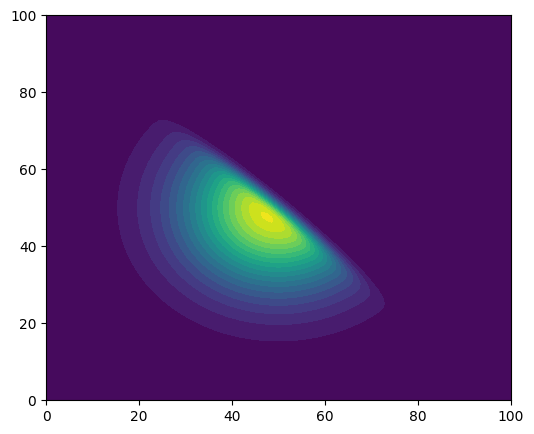

In [31]:
######################

#shape 5 - half sphere

######################

multivariate_skewnorm(np.array([0.5,0.5]), [[200,0],[0,200]]).contour_plot()
#multivariate_skewnorm(np.array([0.5,0.5]), [[200,0],[0,200]]).scatter_plot()

2023-02-19 03:08:20.481535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


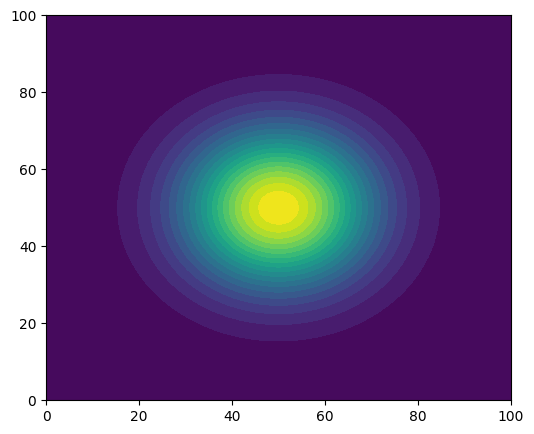

In [7]:
######################

#shape 6 - sphere

######################

multivariate_skewnorm(np.array([0,0]), [[200,0],[0,200]]).contour_plot()
#multivariate_skewnorm(np.array([0,0]), [[200,0],[0,200]]).scatter_plot()

### SAS Transformation

In [8]:
##############################################################

#SinhArcsinh Transformation (SAS distribution) via tensorflow

##############################################################


class SinhArcSinh:
    
    def __init__(self, loc, scale, skewness,tailweight):
        self.loc   = loc
        self.scale = scale
        self.skewness  = skewness
        self.tailweight = tailweight
        

    def scatter_plot(self):
        Z = tfp.distributions.SinhArcsinh(loc = self.loc, 
                                      scale = self.scale, 
                                      skewness=self.skewness, 
                                      tailweight=self.tailweight, 
                                      name='SinhArcsinh')
        
        sample = np.array(Z.sample(2000))
        scatter = plt.scatter(sample[:,0],sample[:,1], alpha=0.2)
        plt.xlim([0,100])
        plt.ylim([0,100])
        return sample, scatter
    
    
    def contour_plot(self):
        Z = tfp.distributions.SinhArcsinh(loc = self.loc, 
                                      scale = self.scale, 
                                      skewness=self.skewness, 
                                      tailweight=self.tailweight, 
                                      name='SinhArcsinh') 
        
        
        xxlim = 0., 100.
        yylim = 0., 100.
    
        xx = tf.linspace(*xxlim, num=100)
        yy = tf.linspace(*yylim, num=100)
        pos = tf.stack(tf.meshgrid(xx, yy), axis = -1)

        fig, ax = plt.subplots(figsize=(6, 5))
        #ax.set_title('')

        pdf = np.empty((100,100))
        for i in range(0,100):
            pdf[i] = Z.prob(pos)[i][:,0]*Z.prob(pos)[i][:,1]
        
        cb = ax.contourf(xx, yy, pdf, levels = 20, cmap=cm.viridis)

        #fig.colorbar(cb, ax=ax)

        ax.set_xlim([0,100])
        ax.set_ylim([0,100])

        #ax.set_xlabel('$x$')
        #ax.set_ylabel('$y$')

        #plt.show()
        
        
        
class Pyramidal_cell:
    
    def __init__(self, loc1, scale1, skewness1,tailweight1, loc2, scale2, skewness2,tailweight2):
        self.loc1   = loc1
        self.scale1 = scale1
        self.skewness1  = skewness1
        self.tailweight1 = tailweight1
        
        self.loc2   = loc2
        self.scale2 = scale2
        self.skewness2  = skewness2
        self.tailweight2 = tailweight2
          
        
    def contour_plot(self):
        
        X = tfp.distributions.SinhArcsinh(loc = self.loc1, 
                                      scale = self.scale1, 
                                      skewness=self.skewness1, 
                                      tailweight=self.tailweight1, 
                                      name='SinhArcsinh')
        
        Y = tfp.distributions.SinhArcsinh(loc = self.loc2, 
                                      scale = self.scale2, 
                                      skewness= self.skewness2, 
                                      tailweight= self.tailweight2, 
                                      name='SinhArcsinh') 
        
        
        xxlim = 0., 100.
        yylim = 0., 100.
        xx = tf.linspace(*xxlim, num=100)
        yy = tf.linspace(*yylim, num=100)
        pos = tf.stack(tf.meshgrid(xx, yy), axis = -1)

        fig, ax = plt.subplots(figsize=(6, 5))
        #ax.set_title('')

        pdf_X = np.empty((100,100))
        for i in range(0,100):
            pdf_X[i] = X.prob(pos)[i][:,0]*X.prob(pos)[i][:,1]
            
        pdf_Y = np.empty((100,100))
        for i in range(0,100):
            pdf_Y[i] = Y.prob(pos)[i][:,0]*Y.prob(pos)[i][:,1]
            
        #Pdf of the middle part of the pyramidal cell    
        Z_prob = multivariate_skewnorm(shape=[5,5], cov=[[30,26],[26,30]]).pdf(pos+[-self.loc2[0],-self.loc2[1]])+ multivariate_skewnorm(shape=[-5,-5], cov=[[30,26],[26,30]]).pdf(pos+[-self.loc1[0],-self.loc1[1]])
        
        
        pdf = pdf_X*(self.scale1[1]/self.scale2[1])*10.5 + pdf_Y*10.5 + Z_prob*2.5
        
        cb = ax.contourf(xx, yy, pdf, levels = 20, cmap=cm.viridis)
        #fig.colorbar(cb, ax=ax)

        ax.set_xlim([0,100])
        ax.set_ylim([0,100])

        #ax.set_xlabel('$x$')
        #ax.set_ylabel('$y$')

        #plt.show()
        
        
        
    def scatter_plot(self):
        X = tfp.distributions.SinhArcsinh(loc = self.loc1, 
                                      scale = self.scale1, 
                                      skewness=self.skewness1, 
                                      tailweight=self.tailweight1, 
                                      name='SinhArcsinh')
        
        Y = tfp.distributions.SinhArcsinh(loc = self.loc2, 
                                      scale = self.scale2, 
                                      skewness= self.skewness2, 
                                      tailweight= self.tailweight2, 
                                      name='SinhArcsinh') 
        
        

        sample_X = np.array(X.sample(1000))
        sample_Y = np.array(Y.sample(1000))
        
        #middle part of pyramidal cell
        sample_Z = multivariate_skewnorm(shape=[5,5], cov=[[30,28],[28,30]]).rvs(size=500)+ multivariate_skewnorm(shape=[-5,-5], cov=[[30,28],[28,30]]).rvs(size=500)
        sample_Z = sample_Z + [(self.loc1[0]+self.loc2[0])*0.5,(self.loc1[1]+self.loc2[1])*0.5]
        sample_Z = np.array(sample_Z)
        
        sample = np.concatenate((sample_X,sample_Y,sample_Z),axis=0)
        
        scatter = plt.scatter(sample[:,0],sample[:,1], alpha=0.2)

        plt.xlim([0,100])
        plt.ylim([0,100])
        
        return sample, scatter


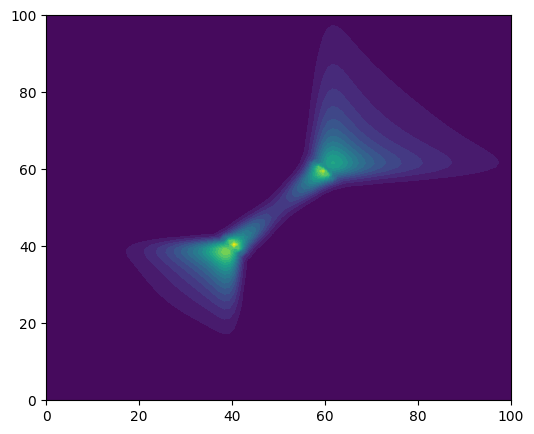

In [9]:
######################################

# shape 1 - Pyramidal cell (version 2)

######################################

Pyramidal_cell(loc1 = [60,60], scale1 = [7,7], skewness1=[1,1], tailweight1=[1.2,1.2],loc2 = [40,40], scale2 = [4,4], skewness2=[-1,-1], tailweight2=[1,1]).contour_plot()
#Pyramidal_cell(loc1 = [60,60], scale1 = [7,7], skewness1=[1,1], tailweight1=[1.2,1.2],loc2 = [40,40], scale2 = [4,4], skewness2=[-1,-1], tailweight2=[1,1]).scatter_plot()

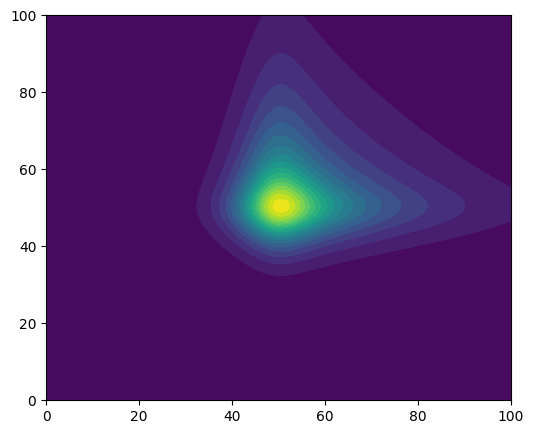

In [10]:
##########

# shape 2

##########

SinhArcSinh(loc=[50,50], scale=[15,15], skewness=[0.5,0.5],tailweight=[1.5,1.5]).contour_plot()
#SinhArcSinh(loc=[50,50], scale=[15,15], skewness=[0.5,0.5],tailweight=[1.5,1.5]).scatter_plot()

In [11]:
def density_matrix(points): 
    
    """
    density_matrix takes a 2D point cloud and returns its density matrix 

    :param points: 2D array of arbitrary length that specifies the spacial location of samples in the point cloud
    :return: 2D array of shape (100,100} describing the density matrix evaluated on samples in the range [(0,0),(100,100)]
    """

    def count_samples(x,y): 
        
        """
        count_samples computes the number of samples of the point cloud in an area of 1x1

        :param x, y: floats for which the number of samples whose first dimension entry lies in [x,x+1) 
                     and second dimension entry lies in [y,y+1) is counted
        :return: number of points within the specified ranges
        """
        
        count = 0
        for i in range(points.shape[0]):
            if np.any((points[i][0] < x+1)&(points[i][0] >= x)) and np.any((points[i][1] < y+1)&(points[i][1] >= y)):
                count += 1
        return count
    
    A = np.empty((100,100))
    
    #Generate density matrix given the number of samples in an 1x1 area
    for x in range(0,100,1):
        for y in range(0,100,1):
            A[x][y] = count_samples(x,y)
    A = (1/points.shape[0]) * A
    return A

In [ ]:
#Density matrix of shape 1
shape1 = Pyramidal_cell(loc1 = [60,60], scale1 = [7,7], skewness1=[1,1], tailweight1=[1.2,1.2],loc2 = [40,40], scale2 = [4,4], skewness2=[-1,-1], tailweight2=[1,1]).scatter_plot()
shape1_density_matrix = density_matrix(shape1[0])
shape1_density_matrix = shape1_density_matrix * (1/sum(sum(shape1_density_matrix))) #Normalizing because not all points lie within ([0,100],[0,100])
%store shape1_density_matrix

In [ ]:
#Density matrix of shape 2
shape2 = SinhArcSinh(loc=[50,50], scale=[15,15], skewness=[0.5,0.5],tailweight=[1.5,1.5]).scatter_plot()
shape2_density_matrix = density_matrix(shape2[0])
shape2_density_matrix = shape2_density_matrix * (1/sum(sum(shape2_density_matrix))) #Normalizing because not all points lie within ([0,100],[0,100])
%store shape2_density_matrix

In [ ]:
#Density matrix of shape 3
shape3 = skew_opposite_dir(np.array([0.5,0.5]),[[230,180],[180,230]]).scatter_plot()
shape3_density_matrix = density_matrix(shape3[0])
shape3_density_matrix = shape3_density_matrix * (1/sum(sum(shape3_density_matrix))) #Normalizing because not all points lie within ([0,100],[0,100])
%store shape3_density_matrix

In [ ]:
#Density matrix of shape 4
shape4 = skew_same_dir(np.array([0.5,0.5]),[[180,135],[135,180]]).scatter_plot()
shape4_density_matrix = density_matrix(shape4[0])
shape4_density_matrix = shape4_density_matrix * (1/sum(sum(shape4_density_matrix))) #Normalizing because not all points lie within ([0,100],[0,100])
%store shape4_density_matrix

In [ ]:
#Density matrix of shape 5
shape5 = multivariate_skewnorm(np.array([0.5,0.5]), [[200,0],[0,200]]).scatter_plot()
shape5_density_matrix = density_matrix(shape5[0])
shape5_density_matrix = shape5_density_matrix * (1/sum(sum(shape5_density_matrix))) #Normalizing because not all points lie within ([0,100],[0,100])
%store shape5_density_matrix

In [ ]:
#shape 6 
shape6 = multivariate_skewnorm(np.array([0,0]), [[200,0],[0,200]]).scatter_plot()
shape6_density_matrix = density_matrix(shape6[0])
shape6_density_matrix = shape6_density_matrix * (1/sum(sum(shape6_density_matrix))) #Normalizing because not all points lie within ([0,100],[0,100])
%store shape6_density_matrix

In [15]:
%store -r shape1_density_matrix
%store -r shape2_density_matrix
%store -r shape3_density_matrix
%store -r shape4_density_matrix
%store -r shape5_density_matrix
%store -r shape6_density_matrix

In [73]:
#Initiate a space of 100 neurons randomly as a matrix with entries zeros and ones
#Create a matrix of shape (200,200) with 100 random entries being one and the rest zero
#The ones represent the position of somata

nums = np.zeros((200,200))                #Matrix of shape (200,200) with entries 0 
nums[:1,0:100] = 1                        #100 entries should be one
nums = nums.flatten()                     #flatten matrix for shuffling
np.random.shuffle(nums)                   #shuffle entries 
nums = np.reshape(nums, (200,200))        #Reshape into matrix of shape (200,200)

nums_pad = np.pad(nums,100)               #Add padding for future convolution, nums_pad has shape (400,400)
%store nums
%store nums_pad

Stored 'nums' (ndarray)
Stored 'nums_pad' (ndarray)


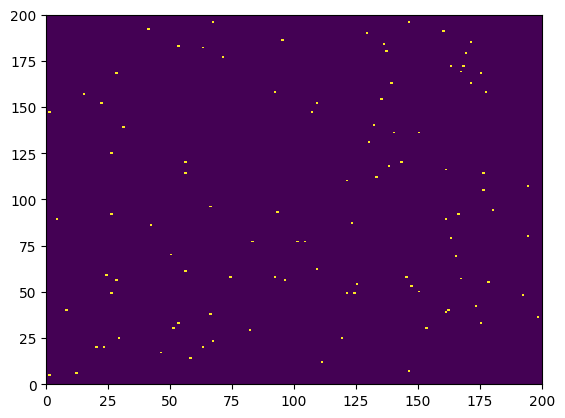

In [74]:
#Save Space of all Somata for the report 
#plt.pcolor(nums)
#plt.rc('xtick', labelsize=15) 
#plt.rc('ytick', labelsize=15) 
#plt.savefig('Somata_space')

In [76]:
def soma_locations(neuron_space): 
    
    """
    soma_locations infers the position of all somata in the space of all neurons

    :param neuron_space: 2D array of arbitrary length 
    :return: 2D array containing the spacial location of one entries in neuron_space
    """
    
    locations = []
    for i in range(0,neuron_space.shape[0]):
        for j in range(0,neuron_space.shape[1]):
            if neuron_space[i][j] == 1: 
                locations.append(np.array([i,j]))
    return np.array(locations)

#soma_locations(nums_pad) #gives locations of the somata in the padded space (padding necessary for convolution)

In [146]:
def connectivity_matrix(axon_morph, dendrite_morph, thr):
    
    """
    connectivity_matrix creates a connectivty matrix via convolution given a threshold value

    :param axon_morph: 2D array of arbitrary length that specifies the shape of the axon, i.e. could be density matrix
    :param dendrite_morph: 2D array of arbitrary length that specifies the shape of the dendrite, i.e. could be density matrix
    :thr: floating point number
    
    :return: 2D array of shape (100,100) specifying the neuronal connectivity
    """
    
    D = np.empty((100,100))
    for x in range(0,100):
        for y in range(0,100):
            B = np.zeros((400,400))
            C = np.zeros((400,400))
            r1 = soma_locations(nums_pad)[x][0]-50
            c1 = soma_locations(nums_pad)[x][1]-50
            r2 = soma_locations(nums_pad)[y][0]-50
            c2 = soma_locations(nums_pad)[y][1]-50
        
            # B[r1:r1+axon_morph.shape[0], c1:c1+axon_morph.shape[1]] = axon_morph --> positions the upper left corner of axon_morph at position (r1,c1) of matrix B
            B[r1:r1+axon_morph.shape[0], c1:c1+axon_morph.shape[1]] = axon_morph 
            
            # C[r2:r2+dendrite_morph.shape[0], c2:c2+dendrite_morph.shape[1]] --> positions the upper left corner of dendrite_morph at position (r2,c2) of matrix C
            C[r2:r2+dendrite_morph.shape[0], c2:c2+dendrite_morph.shape[1]] = dendrite_morph
            
            if sum(sum(np.multiply(B,C))) >= thr: 
                D[x][y]=1            #entry=1 if axon of neuron x connects to dedrite of neuron y
            else: 
                D[x][y]=0
                
    return D

### Connectivity Matrices - Examples

In [ ]:
#matrix1 = connectivity_matrix(shape1_density_matrix, shape6_density_matrix, 2e-6)
#%store matrix1

In [ ]:
#matrix2 = connectivity_matrix(shape1_density_matrix, shape5_density_matrix, 2e-6)
#%store matrix2

In [ ]:
#matrix3 = connectivity_matrix(shape4_density_matrix, shape5_density_matrix, 2e-6)
#%store matrix3

In [ ]:
#matrix4 = connectivity_matrix(shape2_density_matrix, shape3_density_matrix, 2e-6)
#%store matrix4

In [ ]:
#matrix1_version2 = connectivity_matrix(shape1_density_matrix, shape6_density_matrix, 2e-5)
#%store matrix1_version2

In [ ]:
#matrix3_version2 = connectivity_matrix(shape4_density_matrix, shape5_density_matrix, 2e-5)
#%store matrix3_version2

In [ ]:
#matrix4_version2 = connectivity_matrix(shape2_density_matrix, shape3_density_matrix, 2e-5)
#%store matrix4_version2

In [ ]:
#matrix1_version3 = connectivity_matrix(shape1_density_matrix, shape6_density_matrix, 2e-4)
#%store matrix1_version3

In [ ]:
#matrix3_version3 = connectivity_matrix(shape4_density_matrix, shape5_density_matrix, 2e-4)
#%store matrix3_version3

In [ ]:
#matrix4_version3 = connectivity_matrix(shape2_density_matrix, shape3_density_matrix, 2e-4)
#%store matrix4_version3

### Analysis of the connectivity matrices

In [48]:
#Helpful functions 

#Function computes number of axonal connections
def no_connections(matrix):
    totals = np.empty(100)
    for i in range(0,matrix.shape[0]):
        count = 0 
        for j in range(0,matrix.shape[1]):
            if matrix[i][j]==1: 
                count=count+1
        totals[i]=count
    return totals

#Plots number of axonal connections per neuron
def plot_nr_connections(matrices):
    points = np.arange(1,101)
    for i in range(0,matrices.shape[0]):
        connections = no_connections(matrices[i])
        plt.plot(points,connections)
        plt.show()

In [ ]:
os.chdir("/Users/shriyabhatija/Documents/shriya/Dokumente/STUDIUM/MASTER/3. Semester - ERASMUS/Project Scientific Computing/shapes")
xx = np.load('./conn_mat_shape_0.npz')
yy = xx['conn_mat']
plt.pcolor(yy[5])
plt.show()
#plt.savefig('C1', bbox_inches ='tight')

number = no_connections(yy[5])
points = np.arange(1,101)
plt.plot(points,number)
#plt.savefig('NoCon_C1', bbox_inches ='tight')
plt.ylim([0,45])
plt.show()

spec = np.linalg.eig(yy[5])
plt.plot(np.real(spec[0]),np.imag(spec[0]),'.')
plt.ylim([-3,3])
#plt.savefig('Eig_C1', bbox_inches ='tight')

In [ ]:
os.chdir("/Users/shriyabhatija/Documents/shriya/Dokumente/STUDIUM/MASTER/3. Semester - ERASMUS/Project Scientific Computing/shapes")
xx = np.load('./conn_mat_shape_1.npz')
yy = xx['conn_mat']
plt.pcolor(yy[3])
plt.show()
#plt.savefig('C2', bbox_inches ='tight')

number = no_connections(yy[3])
points = np.arange(1,101)
plt.plot(points,number)
plt.ylim([0,45])
#plt.savefig('NoCon_C2', bbox_inches ='tight')
plt.show()

spec = np.linalg.eig(yy[3])
plt.plot(np.real(spec[0]),np.imag(spec[0]),'.')
plt.ylim([-3,3])
#plt.savefig('Eig_C2', bbox_inches ='tight')

In [ ]:
os.chdir("/Users/shriyabhatija/Documents/shriya/Dokumente/STUDIUM/MASTER/3. Semester - ERASMUS/Project Scientific Computing/shapes")
xx = np.load('./conn_mat_shape_2.npz')
yy = xx['conn_mat']
plt.pcolor(yy[4])
plt.show()
#plt.savefig('C3', bbox_inches ='tight')

number = no_connections(yy[4])
points = np.arange(1,101)
plt.plot(points,number)
plt.ylim([0,45])
#plt.savefig('NoCon_C3', bbox_inches ='tight')
plt.show()

spec = np.linalg.eig(yy[4])
plt.plot(np.real(spec[0]),np.imag(spec[0]),'.')
plt.ylim([-3,3])
#plt.savefig('Eig_C3', bbox_inches ='tight')

In [ ]:
os.chdir("/Users/shriyabhatija/Documents/shriya/Dokumente/STUDIUM/MASTER/3. Semester - ERASMUS/Project Scientific Computing/shapes")
xx = np.load('./conn_mat_shape_3.npz')
yy = xx['conn_mat']

In [134]:
os.chdir("/Users/shriyabhatija/Documents/shriya/Dokumente/STUDIUM/MASTER/3. Semester - ERASMUS/Project Scientific Computing/shapes")
xx = np.load('./conn_mat_shape_4.npz')
yy = xx['conn_mat']

In [135]:
os.chdir("/Users/shriyabhatija/Documents/shriya/Dokumente/STUDIUM/MASTER/3. Semester - ERASMUS/Project Scientific Computing/shapes")
xx = np.load('./conn_mat_shape_5.npz')
yy = xx['conn_mat']